In [1]:
import numpy as np
import pandas as pd

In [2]:
animals=pd.read_csv('data/animals.csv')
animals.head()

brainwt   bodywt      animal
0    3.385   44.500  Arctic_fox
1    0.480   15.499  Owl_monkey
2    1.350    8.100      Beaver
3  464.983  423.012         Cow
4   36.328  119.498   Gray_wolf

In [3]:
animals['bodywtkg']=animals.bodywt*0.4536

animals.head()

brainwt   bodywt      animal    bodywtkg
0    3.385   44.500  Arctic_fox   20.185200
1    0.480   15.499  Owl_monkey    7.030346
2    1.350    8.100      Beaver    3.674160
3  464.983  423.012         Cow  191.878243
4   36.328  119.498   Gray_wolf   54.204293

In [4]:
animals['wtratio']=animals.bodywt/animals.brainwt

animals.head()

brainwt   bodywt      animal    bodywtkg    wtratio
0    3.385   44.500  Arctic_fox   20.185200  13.146233
1    0.480   15.499  Owl_monkey    7.030346  32.289583
2    1.350    8.100      Beaver    3.674160   6.000000
3  464.983  423.012         Cow  191.878243   0.909736
4   36.328  119.498   Gray_wolf   54.204293   3.289419

In [5]:
animals['zero']=np.where(animals.brainwt!=0, animals.bodywt/animals.brainwt, 0) # condicion, if , else

animals.head()

brainwt   bodywt      animal    bodywtkg    wtratio       zero
0    3.385   44.500  Arctic_fox   20.185200  13.146233  13.146233
1    0.480   15.499  Owl_monkey    7.030346  32.289583  32.289583
2    1.350    8.100      Beaver    3.674160   6.000000   6.000000
3  464.983  423.012         Cow  191.878243   0.909736   0.909736
4   36.328  119.498   Gray_wolf   54.204293   3.289419   3.289419

### Eval y query

In [6]:
df1=pd.DataFrame(np.random.random((10, 3)), columns=['a', 'b', 'c'])
df2=pd.DataFrame(np.random.random((10, 3)), columns=['a', 'b', 'c'])

In [7]:
df1.head()

a         b         c
0  0.610355  0.258805  0.118118
1  0.043718  0.652617  0.086840
2  0.830372  0.684842  0.704892
3  0.627891  0.032752  0.604602
4  0.316669  0.014617  0.800999

In [8]:
df2.head()

a         b         c
0  0.816510  0.483260  0.271335
1  0.239154  0.791797  0.502819
2  0.311480  0.584019  0.011975
3  0.284622  0.241040  0.390138
4  0.980457  0.719618  0.147713

In [9]:
pd.eval('df1<df2')

a      b      c
0   True   True   True
1   True   True   True
2  False  False  False
3  False   True  False
4   True   True  False
5   True   True   True
6   True   True   True
7  False   True  False
8  False   True  False
9  False   True   True

In [10]:
df1.eval('b>0')

0    True
1    True
2    True
3    True
4    True
5    True
6    True
7    True
8    True
9    True
dtype: bool

In [11]:
df1.query('b>0.5')

a         b         c
1  0.043718  0.652617  0.086840
2  0.830372  0.684842  0.704892
5  0.021302  0.543303  0.181930
7  0.102737  0.660561  0.394853

In [12]:
df1.query('b<0')

Empty DataFrame
Columns: [a, b, c]
Index: []

In [13]:
df1.query('b>0.5 & a>0.3') # and

a         b         c
2  0.830372  0.684842  0.704892

In [14]:
df1.query('b>0.5 | a>0.3') # or

a         b         c
0  0.610355  0.258805  0.118118
1  0.043718  0.652617  0.086840
2  0.830372  0.684842  0.704892
3  0.627891  0.032752  0.604602
4  0.316669  0.014617  0.800999
5  0.021302  0.543303  0.181930
6  0.313334  0.019690  0.447052
7  0.102737  0.660561  0.394853
8  0.394869  0.428948  0.948922
9  0.927033  0.134369  0.154404

In [15]:
df1.query('b>0.5 | a>0.3')['a'].apply(lambda x: round(x, 3))[0]  # redondeo

0.61

### lookup

In [16]:
seasons=pd.DataFrame(np.random.random((10, 4)), 
                     columns=['winter', 'spring', 'summer', 'autumn'])
seasons

winter    spring    summer    autumn
0  0.051740  0.403165  0.938470  0.106661
1  0.274763  0.722286  0.341302  0.196863
2  0.694647  0.485548  0.509852  0.369864
3  0.472554  0.994799  0.600891  0.347314
4  0.892072  0.727706  0.858926  0.538822
5  0.894322  0.300754  0.011808  0.409447
6  0.461577  0.047833  0.752147  0.383633
7  0.240800  0.310071  0.579655  0.561500
8  0.344388  0.766737  0.748224  0.834031
9  0.270900  0.807941  0.863685  0.199661

In [17]:
look=['summer', 'winter','spring', 
      'winter', 'summer', 'autumn',
      'autumn', 'summer', 'autumn', 'spring']

seasons['look']=seasons.lookup(seasons.index, look)

In [18]:
seasons.index

RangeIndex(start=0, stop=10, step=1)

In [19]:
seasons.head()

winter    spring    summer    autumn      look
0  0.051740  0.403165  0.938470  0.106661  0.938470
1  0.274763  0.722286  0.341302  0.196863  0.274763
2  0.694647  0.485548  0.509852  0.369864  0.485548
3  0.472554  0.994799  0.600891  0.347314  0.472554
4  0.892072  0.727706  0.858926  0.538822  0.858926

### get

In [20]:
seasons.get(seasons.winter>0.5)

winter    spring    summer    autumn      look
2  0.694647  0.485548  0.509852  0.369864  0.485548
4  0.892072  0.727706  0.858926  0.538822  0.858926
5  0.894322  0.300754  0.011808  0.409447  0.409447

In [21]:
seasons.get((seasons.winter>0.5) & (seasons.spring>0.3))

winter    spring    summer    autumn      look
2  0.694647  0.485548  0.509852  0.369864  0.485548
4  0.892072  0.727706  0.858926  0.538822  0.858926
5  0.894322  0.300754  0.011808  0.409447  0.409447

In [22]:
seasons.get((seasons.winter>0.5) | (seasons.spring>0.3))

winter    spring    summer    autumn      look
0  0.051740  0.403165  0.938470  0.106661  0.938470
1  0.274763  0.722286  0.341302  0.196863  0.274763
2  0.694647  0.485548  0.509852  0.369864  0.485548
3  0.472554  0.994799  0.600891  0.347314  0.472554
4  0.892072  0.727706  0.858926  0.538822  0.858926
5  0.894322  0.300754  0.011808  0.409447  0.409447
7  0.240800  0.310071  0.579655  0.561500  0.579655
8  0.344388  0.766737  0.748224  0.834031  0.834031
9  0.270900  0.807941  0.863685  0.199661  0.807941

In [23]:
seasons.get('winter')

0    0.051740
1    0.274763
2    0.694647
3    0.472554
4    0.892072
5    0.894322
6    0.461577
7    0.240800
8    0.344388
9    0.270900
Name: winter, dtype: float64

In [24]:
seasons.winter

0    0.051740
1    0.274763
2    0.694647
3    0.472554
4    0.892072
5    0.894322
6    0.461577
7    0.240800
8    0.344388
9    0.270900
Name: winter, dtype: float64

### index y reindex

In [25]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

cols=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 
      'acceleration', 'model_year', 'origin', 'car_name']

In [26]:
auto=pd.read_csv(url, names=cols, sep='\\s+')

auto.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [27]:
auto.shape

(398, 9)

In [28]:
auto.index

RangeIndex(start=0, stop=398, step=1)

In [29]:
auto.index=pd.RangeIndex(0, 398*2, 2)

auto.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
2  15.0          8         350.0      165.0  3693.0          11.5          70   
4  18.0          8         318.0      150.0  3436.0          11.0          70   
6  16.0          8         304.0      150.0  3433.0          12.0          70   
8  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
2       1          buick skylark 320  
4       1         plymouth satellite  
6       1              amc rebel sst  
8       1                ford torino

In [30]:
auto.index=range(len(auto))

auto.head()

mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [31]:
auto.index=auto.car_name

auto.head()

mpg  cylinders  displacement horsepower  weight  \
car_name                                                                      
chevrolet chevelle malibu  18.0          8         307.0      130.0  3504.0   
buick skylark 320          15.0          8         350.0      165.0  3693.0   
plymouth satellite         18.0          8         318.0      150.0  3436.0   
amc rebel sst              16.0          8         304.0      150.0  3433.0   
ford torino                17.0          8         302.0      140.0  3449.0   

                           acceleration  model_year  origin  \
car_name                                                      
chevrolet chevelle malibu          12.0          70       1   
buick skylark 320                  11.5          70       1   
plymouth satellite                 11.0          70       1   
amc rebel sst                      12.0          70       1   
ford torino                        10.5          70       1   

                                            car_name  
car_name                                              
chevrolet chevelle malibu  chevrolet chevelle malibu  
buick skylark 320                  buick skylark 320  
plymouth satellite                plymouth satellite  
amc rebel sst                          amc rebel sst  
ford torino                              ford torino

In [32]:
#auto=auto.set_index('mpg')

auto.set_index('mpg', inplace=True)


In [33]:
auto.head()

cylinders  displacement horsepower  weight  acceleration  model_year  \
mpg                                                                          
18.0          8         307.0      130.0  3504.0          12.0          70   
15.0          8         350.0      165.0  3693.0          11.5          70   
18.0          8         318.0      150.0  3436.0          11.0          70   
16.0          8         304.0      150.0  3433.0          12.0          70   
17.0          8         302.0      140.0  3449.0          10.5          70   

      origin                   car_name  
mpg                                      
18.0       1  chevrolet chevelle malibu  
15.0       1          buick skylark 320  
18.0       1         plymouth satellite  
16.0       1              amc rebel sst  
17.0       1                ford torino

In [34]:
auto.index=range(len(auto))

auto.head()

cylinders  displacement horsepower  weight  acceleration  model_year  \
0          8         307.0      130.0  3504.0          12.0          70   
1          8         350.0      165.0  3693.0          11.5          70   
2          8         318.0      150.0  3436.0          11.0          70   
3          8         304.0      150.0  3433.0          12.0          70   
4          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [38]:
auto.describe().T['mean']

cylinders          5.454774
displacement     193.425879
weight          2970.424623
acceleration      15.568090
model_year        76.010050
origin             1.572864
Name: mean, dtype: float64

In [39]:
auto.describe().loc['mean']

cylinders          5.454774
displacement     193.425879
weight          2970.424623
acceleration      15.568090
model_year        76.010050
origin             1.572864
Name: mean, dtype: float64

### Multi index

In [43]:
(auto.car_name+' '+auto.model_year.map(str)).value_counts()

plymouth reliant 81                 2
ford pinto 75                       2
subaru 81                           1
amc concord dl 82                   1
peugeot 604sl 78                    1
                                   ..
plymouth 'cuda 340 70               1
capri ii 76                         1
volvo diesel 81                     1
chevrolet malibu classic (sw) 79    1
saab 99le 73                        1
Length: 396, dtype: int64

In [44]:
auto.drop_duplicates(subset=['car_name', 'model_year'], inplace=True)

In [45]:
auto.set_index(['car_name', 'model_year'], inplace=True)

auto.head()

cylinders  displacement horsepower  \
car_name                  model_year                                       
chevrolet chevelle malibu 70                  8         307.0      130.0   
buick skylark 320         70                  8         350.0      165.0   
plymouth satellite        70                  8         318.0      150.0   
amc rebel sst             70                  8         304.0      150.0   
ford torino               70                  8         302.0      140.0   

                                      weight  acceleration  origin  
car_name                  model_year                                
chevrolet chevelle malibu 70          3504.0          12.0       1  
buick skylark 320         70          3693.0          11.5       1  
plymouth satellite        70          3436.0          11.0       1  
amc rebel sst             70          3433.0          12.0       1  
ford torino               70          3449.0          10.5       1

In [46]:
auto.index[0]

('chevrolet chevelle malibu', 70)

In [47]:
new_index=[('fiat punto', 71)]+list(auto.index)

auto_reindexed=auto.reindex(new_index)
auto_reindexed

cylinders  displacement horsepower  \
car_name                  model_year                                       
fiat punto                71                NaN           NaN        NaN   
chevrolet chevelle malibu 70                8.0         307.0      130.0   
buick skylark 320         70                8.0         350.0      165.0   
plymouth satellite        70                8.0         318.0      150.0   
amc rebel sst             70                8.0         304.0      150.0   
...                                         ...           ...        ...   
ford mustang gl           82                4.0         140.0      86.00   
vw pickup                 82                4.0          97.0      52.00   
dodge rampage             82                4.0         135.0      84.00   
ford ranger               82                4.0         120.0      79.00   
chevy s-10                82                4.0         119.0      82.00   

                                      weight  acceleration  origin  
car_name                  model_year                                
fiat punto                71             NaN           NaN     NaN  
chevrolet chevelle malibu 70          3504.0          12.0     1.0  
buick skylark 320         70          3693.0          11.5     1.0  
plymouth satellite        70          3436.0          11.0     1.0  
amc rebel sst             70          3433.0          12.0     1.0  
...                                      ...           ...     ...  
ford mustang gl           82          2790.0          15.6     1.0  
vw pickup                 82          2130.0          24.6     2.0  
dodge rampage             82          2295.0          11.6     1.0  
ford ranger               82          2625.0          18.6     1.0  
chevy s-10                82          2720.0          19.4     1.0  

[397 rows x 6 columns]

## Correlacion

In [49]:
vehicles=pd.read_csv('data/vehicles/vehicles.csv')

vehicles.head()

Make                Model  Year  Engine Displacement  \
0        AM General    DJ Po Vehicle 2WD  1984                  2.5   
1        AM General     FJ8c Post Office  1984                  4.2   
2        AM General  Post Office DJ5 2WD  1985                  2.5   
3        AM General  Post Office DJ8 2WD  1985                  4.2   
4  ASC Incorporated                  GNX  1987                  3.8   

   Cylinders     Transmission        Drivetrain                Vehicle Class  \
0        4.0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   
1        6.0  Automatic 3-spd     2-Wheel Drive  Special Purpose Vehicle 2WD   
2        4.0  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   
3        6.0  Automatic 3-spd  Rear-Wheel Drive  Special Purpose Vehicle 2WD   
4        6.0  Automatic 4-spd  Rear-Wheel Drive                 Midsize Cars   

  Fuel Type  Fuel Barrels/Year  City MPG  Highway MPG  Combined MPG  \
0   Regular          19.388824        18           17            17   
1   Regular          25.354615        13           13            13   
2   Regular          20.600625        16           17            16   
3   Regular          25.354615        13           13            13   
4   Premium          20.600625        14           21            16   

   CO2 Emission Grams/Mile  Fuel Cost/Year  
0               522.764706            1950  
1               683.615385            2550  
2               555.437500            2100  
3               683.615385            2550  
4               555.437500            2550

In [50]:
vehicles['City MPG'].corr(vehicles['Highway MPG'])

0.92385558852884

In [51]:
vehicles.corr()  # matriz de correlacion

Year  Engine Displacement  Cylinders  \
Year                     1.000000             0.037876   0.082469   
Engine Displacement      0.037876             1.000000   0.901858   
Cylinders                0.082469             0.901858   1.000000   
Fuel Barrels/Year       -0.221084             0.789752   0.739517   
City MPG                 0.161818            -0.740317  -0.703866   
Highway MPG              0.267259            -0.715039  -0.650287   
Combined MPG             0.204751            -0.746782  -0.698648   
CO2 Emission Grams/Mile -0.222300             0.803520   0.752393   
Fuel Cost/Year          -0.091913             0.769678   0.778153   

                         Fuel Barrels/Year  City MPG  Highway MPG  \
Year                             -0.221084  0.161818     0.267259   
Engine Displacement               0.789752 -0.740317    -0.715039   
Cylinders                         0.739517 -0.703866    -0.650287   
Fuel Barrels/Year                 1.000000 -0.877752    -0.909664   
City MPG                         -0.877752  1.000000     0.923856   
Highway MPG                      -0.909664  0.923856     1.000000   
Combined MPG                     -0.909743  0.985457     0.969392   
CO2 Emission Grams/Mile           0.986189 -0.894139    -0.926405   
Fuel Cost/Year                    0.916208 -0.858645    -0.851404   

                         Combined MPG  CO2 Emission Grams/Mile  Fuel Cost/Year  
Year                         0.204751                -0.222300       -0.091913  
Engine Displacement         -0.746782                 0.803520        0.769678  
Cylinders                   -0.698648                 0.752393        0.778153  
Fuel Barrels/Year           -0.909743                 0.986189        0.916208  
City MPG                     0.985457                -0.894139       -0.858645  
Highway MPG                  0.969392                -0.926405       -0.851404  
Combined MPG                 1.000000                -0.926229       -0.875185  
CO2 Emission Grams/Mile     -0.926229                 1.000000        0.930865  
Fuel Cost/Year              -0.875185                 0.930865        1.000000

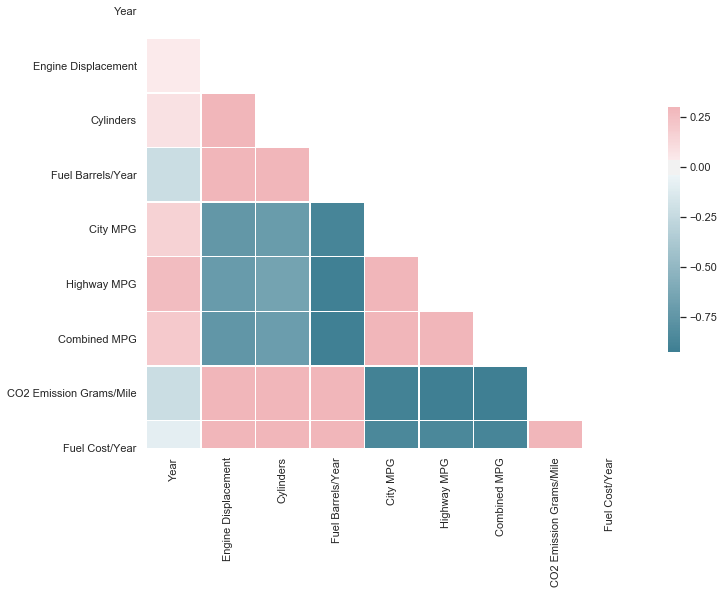

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="white")

# Compute the correlation matrix
corr = vehicles.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});



In [54]:
vehicles.corr(method='pearson')  # [-1,1]

Year  Engine Displacement  Cylinders  \
Year                     1.000000             0.037876   0.082469   
Engine Displacement      0.037876             1.000000   0.901858   
Cylinders                0.082469             0.901858   1.000000   
Fuel Barrels/Year       -0.221084             0.789752   0.739517   
City MPG                 0.161818            -0.740317  -0.703866   
Highway MPG              0.267259            -0.715039  -0.650287   
Combined MPG             0.204751            -0.746782  -0.698648   
CO2 Emission Grams/Mile -0.222300             0.803520   0.752393   
Fuel Cost/Year          -0.091913             0.769678   0.778153   

                         Fuel Barrels/Year  City MPG  Highway MPG  \
Year                             -0.221084  0.161818     0.267259   
Engine Displacement               0.789752 -0.740317    -0.715039   
Cylinders                         0.739517 -0.703866    -0.650287   
Fuel Barrels/Year                 1.000000 -0.877752    -0.909664   
City MPG                         -0.877752  1.000000     0.923856   
Highway MPG                      -0.909664  0.923856     1.000000   
Combined MPG                     -0.909743  0.985457     0.969392   
CO2 Emission Grams/Mile           0.986189 -0.894139    -0.926405   
Fuel Cost/Year                    0.916208 -0.858645    -0.851404   

                         Combined MPG  CO2 Emission Grams/Mile  Fuel Cost/Year  
Year                         0.204751                -0.222300       -0.091913  
Engine Displacement         -0.746782                 0.803520        0.769678  
Cylinders                   -0.698648                 0.752393        0.778153  
Fuel Barrels/Year           -0.909743                 0.986189        0.916208  
City MPG                     0.985457                -0.894139       -0.858645  
Highway MPG                  0.969392                -0.926405       -0.851404  
Combined MPG                 1.000000                -0.926229       -0.875185  
CO2 Emission Grams/Mile     -0.926229                 1.000000        0.930865  
Fuel Cost/Year              -0.875185                 0.930865        1.000000

In [55]:
vehicles.corr(method='spearman')

Year  Engine Displacement  Cylinders  \
Year                     1.000000             0.051370   0.068727   
Engine Displacement      0.051370             1.000000   0.927979   
Cylinders                0.068727             0.927979   1.000000   
Fuel Barrels/Year       -0.214857             0.827152   0.784595   
City MPG                 0.157137            -0.848167  -0.818672   
Highway MPG              0.266934            -0.754080  -0.698356   
Combined MPG             0.205080            -0.824065  -0.783362   
CO2 Emission Grams/Mile -0.215108             0.831333   0.788777   
Fuel Cost/Year          -0.091437             0.794755   0.790481   

                         Fuel Barrels/Year  City MPG  Highway MPG  \
Year                             -0.214857  0.157137     0.266934   
Engine Displacement               0.827152 -0.848167    -0.754080   
Cylinders                         0.784595 -0.818672    -0.698356   
Fuel Barrels/Year                 1.000000 -0.974144    -0.963335   
City MPG                         -0.974144  1.000000     0.930120   
Highway MPG                      -0.963335  0.930120     1.000000   
Combined MPG                     -0.990364  0.985062     0.970769   
CO2 Emission Grams/Mile           0.995539 -0.979787    -0.968693   
Fuel Cost/Year                    0.919069 -0.928713    -0.876067   

                         Combined MPG  CO2 Emission Grams/Mile  Fuel Cost/Year  
Year                         0.205080                -0.215108       -0.091437  
Engine Displacement         -0.824065                 0.831333        0.794755  
Cylinders                   -0.783362                 0.788777        0.790481  
Fuel Barrels/Year           -0.990364                 0.995539        0.919069  
City MPG                     0.985062                -0.979787       -0.928713  
Highway MPG                  0.970769                -0.968693       -0.876067  
Combined MPG                 1.000000                -0.995258       -0.926078  
CO2 Emission Grams/Mile     -0.995258                 1.000000        0.922723  
Fuel Cost/Year              -0.926078                 0.922723        1.000000

In [56]:
vehicles.corr(method='kendall')

Year  Engine Displacement  Cylinders  \
Year                     1.000000             0.037129   0.053817   
Engine Displacement      0.037129             1.000000   0.814208   
Cylinders                0.053817             0.814208   1.000000   
Fuel Barrels/Year       -0.152204             0.663295   0.664196   
City MPG                 0.110961            -0.692362  -0.702624   
Highway MPG              0.189554            -0.579679  -0.575368   
Combined MPG             0.145378            -0.658312  -0.662099   
CO2 Emission Grams/Mile -0.151399             0.661452   0.662733   
Fuel Cost/Year          -0.064127             0.623155   0.668536   

                         Fuel Barrels/Year  City MPG  Highway MPG  \
Year                             -0.152204  0.110961     0.189554   
Engine Displacement               0.663295 -0.692362    -0.579679   
Cylinders                         0.664196 -0.702624    -0.575368   
Fuel Barrels/Year                 1.000000 -0.923174    -0.886350   
City MPG                         -0.923174  1.000000     0.817141   
Highway MPG                      -0.886350  0.817141     1.000000   
Combined MPG                     -0.981534  0.940689     0.896640   
CO2 Emission Grams/Mile           0.987864 -0.922527    -0.885328   
Fuel Cost/Year                    0.817171 -0.816957    -0.733986   

                         Combined MPG  CO2 Emission Grams/Mile  Fuel Cost/Year  
Year                         0.145378                -0.151399       -0.064127  
Engine Displacement         -0.658312                 0.661452        0.623155  
Cylinders                   -0.662099                 0.662733        0.668536  
Fuel Barrels/Year           -0.981534                 0.987864        0.817171  
City MPG                     0.940689                -0.922527       -0.816957  
Highway MPG                  0.896640                -0.885328       -0.733986  
Combined MPG                 1.000000                -0.977930       -0.824848  
CO2 Emission Grams/Mile     -0.977930                 1.000000        0.814330  
Fuel Cost/Year              -0.824848                 0.814330        1.000000

# Ejemplo

In [58]:
student=pd.read_csv('data/student-mat.csv')

student

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0    ...      4        3      4     1     1      3        6   5   6   6  
1    ...      5        3      3     1     1      3        4   5   5   6  
2    ...      4        3      2     2     3      3       10   7   8  10  
3    ...      3        2      2     1     1      5        2  15  14  15  
4    ...      4        3      2     1     2      5        4   6  10  10  
..   ...    ...      ...    ...   ...   ...    ...      ...  ..  ..  ..  
390  ...      5        5      4     4     5      4       11   9   9   9  
391  ...      2        4      5     3     4      2        3  14  16  16  
392  ...      5        5      3     3     3      3        3  10   8   7  
393  ...      4        4      1     3     4      5        0  11  12  10  
394  ...      3        2      3     3     3      5        5   8   9   9  

[395 rows x 33 columns]

In [59]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [60]:
student.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.998862    1.113278    0.890741    1.287897    1.390303   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    3.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  395.000000  395.000000  395.000000  395.000000  
mean     5.708861   10.908861   10.713924   10.415190  
std      8.003096    3.319195    3.761505    4.581443  
min      0.000000    3.000000    0.000000    0.000000  
25%      0.000000    8.000000    9.000000    8.000000  
50%      4.000000   11.000000   11.000000   11.000000  
75%      8.000000   13.000000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

In [61]:
pd.crosstab(index=student.sex, columns='count')

col_0  count
sex         
F        208
M        187

In [62]:
pd.crosstab(index=student.sex, columns=student.activities)

activities   no  yes
sex                 
F           112   96
M            82  105

In [64]:
student[['sex', 'activities']].head()

sex activities
0   F         no
1   F         no
2   F         no
3   F        yes
4   F         no

In [65]:
pd.crosstab(index=student.sex, columns=student.famsize)

famsize  GT3  LE3
sex              
F        156   52
M        125   62

# pivot table

In [66]:
student.pivot_table(index=['school'], 
                    columns=['sex', 'studytime'],
                    values=['G3'], 
                    fill_value=0)

G3                                                  \
sex                F                                    M              
studytime          1          2          3   4          1          2   
school                                                                 
GP         10.652174   9.363636  10.590909  11  10.363636  11.090909   
MS          5.250000  10.428571  11.571429   0   8.750000  10.875000   

                            
sex                         
studytime          3     4  
school                      
GP         13.923077  11.7  
MS         13.000000   0.0

In [68]:
student.pivot_table(index=['school'], 
                    columns=['sex', 'studytime'],
                    values=['G3'], 
                    fill_value=0, 
                    aggfunc='mean')

G3                                                  \
sex                F                                    M              
studytime          1          2          3   4          1          2   
school                                                                 
GP         10.652174   9.363636  10.590909  11  10.363636  11.090909   
MS          5.250000  10.428571  11.571429   0   8.750000  10.875000   

                            
sex                         
studytime          3     4  
school                      
GP         13.923077  11.7  
MS         13.000000   0.0

In [69]:
student.pivot_table(index=['school'], 
                    columns=['sex', 'studytime'],
                    values=['G3'], 
                    fill_value=0, 
                    aggfunc='count')

G3                            
sex         F               M            
studytime   1   2   3   4   1   2   3   4
school                                   
GP         23  99  44  17  66  77  13  10
MS          4  14   7   0  12   8   1   0

In [70]:
student.pivot_table(index=['school'], 
                    columns=['sex', 'studytime'],
                    values=['G3'], 
                    fill_value=0, 
                    aggfunc='max')

G3                            
sex         F               M            
studytime   1   2   3   4   1   2   3   4
school                                   
GP         18  18  19  18  19  19  18  20
MS         10  15  19   0  16  14  13   0

In [82]:
student[(student.school=='GP') & (student.studytime==1) & (student.sex=='F')]['G3'].max()

18

In [72]:
student.G3.max()

20

In [73]:
df=student.pivot_table(index=['school'], 
                    columns=['sex', 'studytime'],
                    values=['G3'], 
                    fill_value=0, 
                    aggfunc='max')

In [75]:
type(df)

pandas.core.frame.DataFrame

In [78]:
df[('G3', 'F', 3)]

school
GP    19
MS    19
Name: (G3, F, 3), dtype: int64

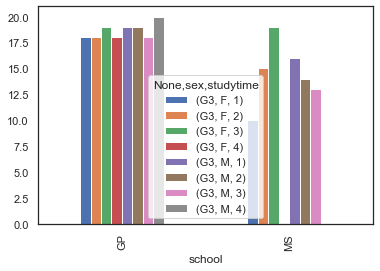

In [86]:
df.plot(kind='bar')